https://mne.tools/dev/auto_tutorials/intro/70_report.html#tut-report

Extracting EDF parameters from e:\WEBSITE\EDF_analysis\EDF+\Zacker\Zacker.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 139775  =      0.000 ...  1091.992 secs...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwid

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA to data using 32 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 6.2s.


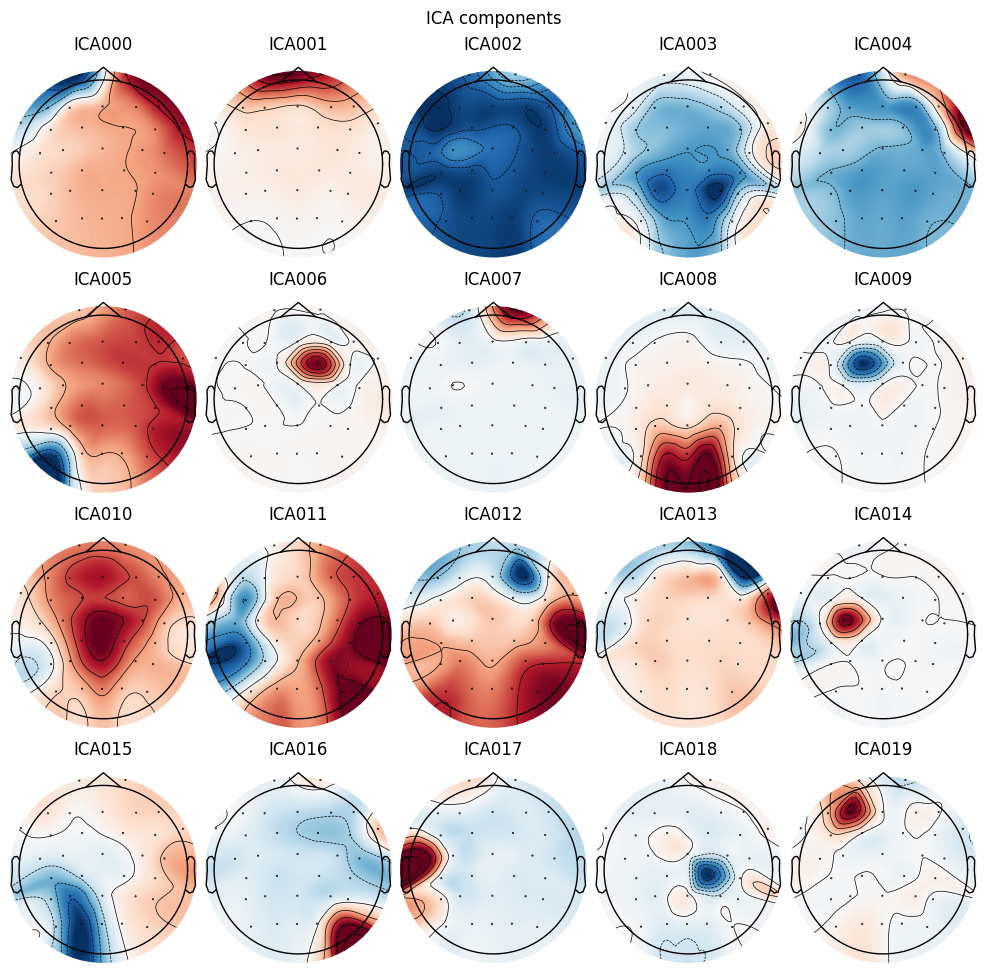

Using threshold: 0.44 for CTPS ECG detection
Using channel Fp1 to identify heart beats.
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 1280 samples (10.000 s)

Number of ECG events detected : 1025 (average pulse 56 / min.)
Not setting metadata
1025 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
Using data from preloaded Raw for 1025 events and 129 original time points ...
0 bad epochs dropped


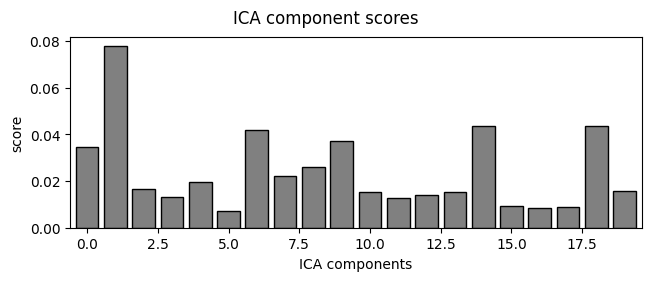

Applying ICA solution(s)
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components
Now plotting raw data
Using matplotlib as 2D backend.


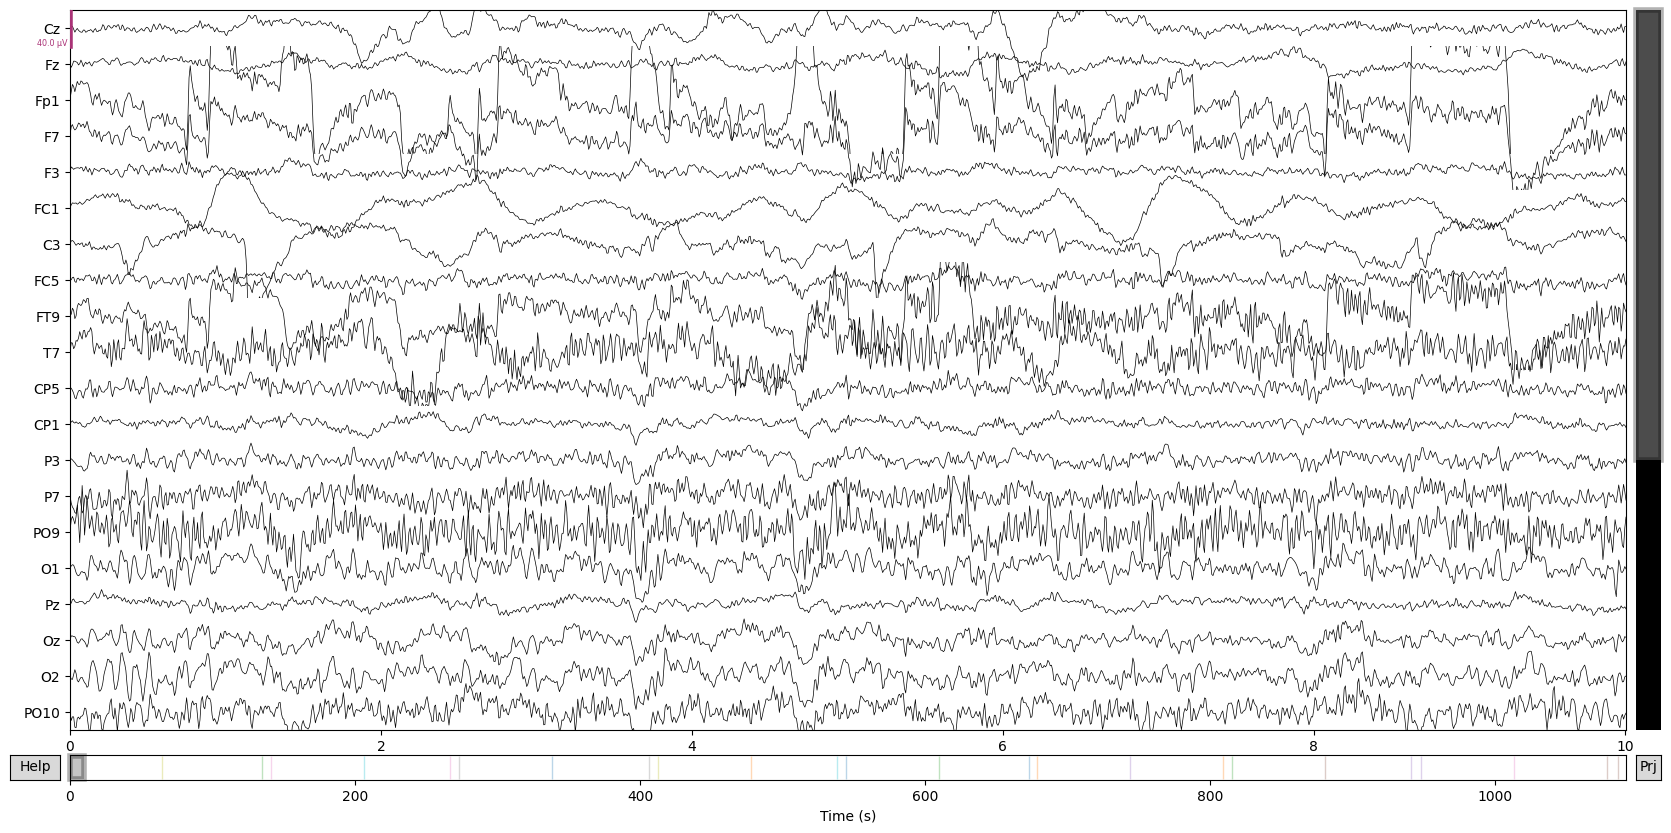

Now plotting cleaned data!


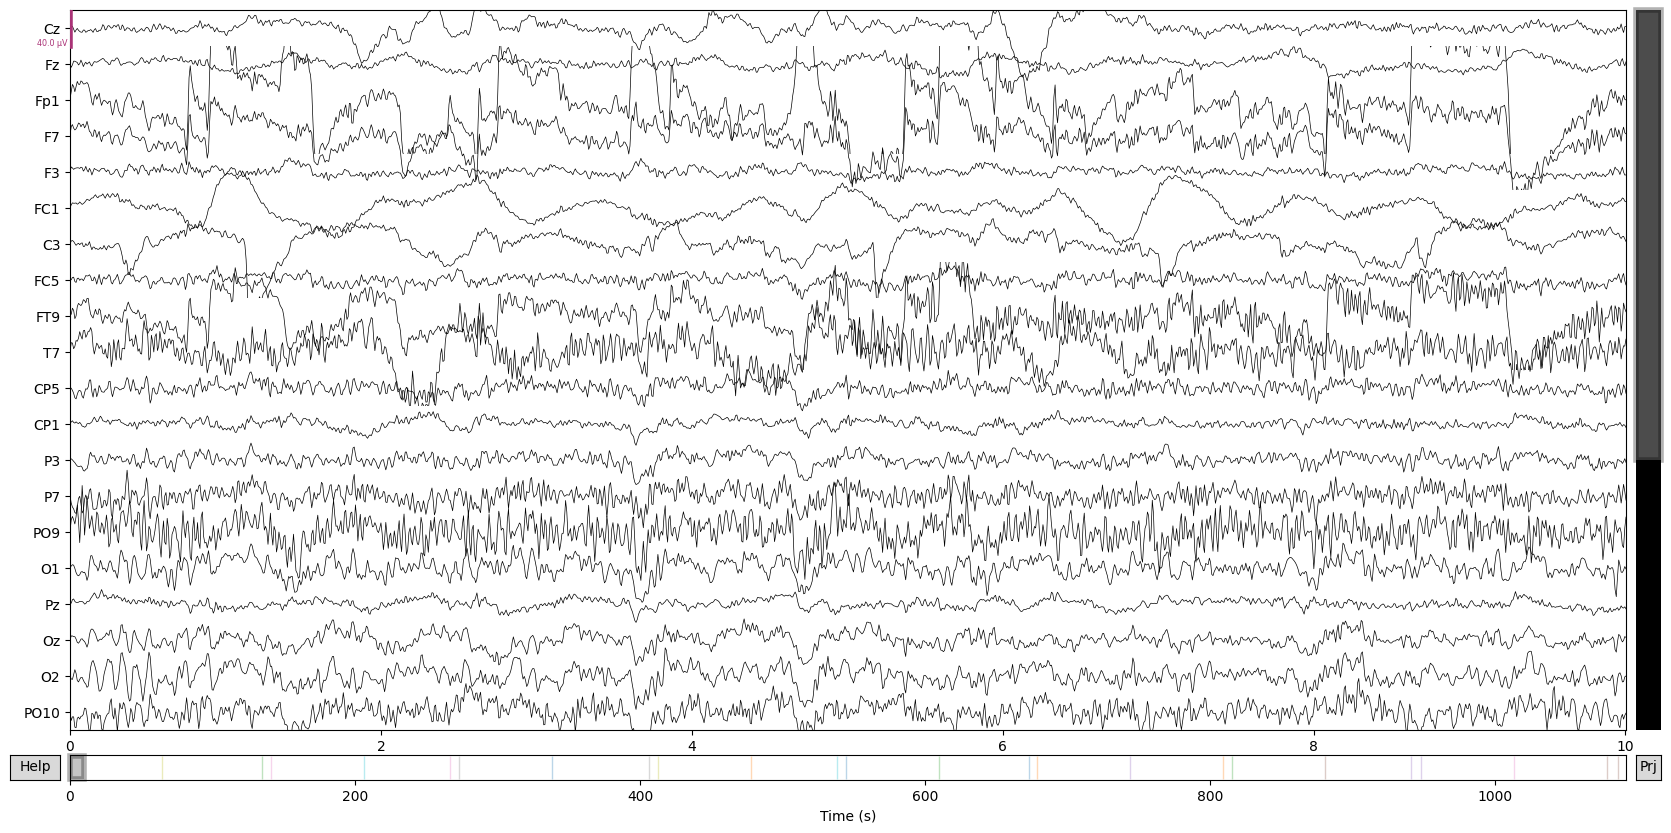

Now generating report
Embedding : jquery-3.6.0.min.js
Embedding : bootstrap.bundle.min.js
Embedding : bootstrap.min.css
Embedding : bootstrap-table/bootstrap-table.min.js
Embedding : bootstrap-table/bootstrap-table.min.css
Embedding : bootstrap-table/bootstrap-table-copy-rows.min.js
Embedding : bootstrap-table/bootstrap-table-export.min.js
Embedding : bootstrap-table/tableExport.min.js
Embedding : bootstrap-icons/bootstrap-icons.mne.min.css
Embedding : highlightjs/highlight.min.js
Embedding : highlightjs/atom-one-dark-reasonable.min.css
Saving report to : E:\WEBSITE\EDF_analysis\method_examples\report_processed_eeg.html


'E:\\WEBSITE\\EDF_analysis\\method_examples\\report_processed_eeg.html'

In [2]:
import mne
from mne.preprocessing import ICA
import matplotlib.pyplot as plt
from pathlib import Path

# Read your EDF file
raw = mne.io.read_raw_edf(r'..\EDF+\Zacker\Zacker.edf', preload=True, verbose=True, infer_types=True)

# Select only EEG channels
eeg_channels = ['Cz', 'Fz', 'Fp1', 'F7', 'F3', 'FC1', 'C3', 'FC5', 'FT9', 'T7', 'CP5', 'CP1', 'P3', 'P7', 'PO9', 'O1', 'Pz', 'Oz', 'O2', 'PO10', 'P8', 'P4', 'CP2', 'CP6', 'T8', 'FT10', 'FC6', 'C4', 'FC2', 'F4', 'F8', 'Fp2']
raw.pick_channels(eeg_channels)

# Set montage
montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage, on_missing='ignore')

# Apply preprocessing steps
raw.set_eeg_reference('average', projection=True)  # set EEG average reference
raw.filter(l_freq=1, h_freq=40)  # Apply band-pass filter

# Apply ICA to the raw EEG data to remove artifacts
# Set up ICA
ica = ICA(n_components=20, random_state=97, max_iter=800) # doesn't work here: , n_jobs=4

# Fit ICA on the raw EEG data
ica.fit(raw)

# Plot ICA components to manually inspect and identify components that capture eye blinks
ica.plot_components()

# Use built-in methods to automatically find ECG-like components
ecg_indices, ecg_scores = ica.find_bads_ecg(raw, ch_name='Fp1')  # assuming Fp1 is most likely to capture ECG artifacts, doesn't work here: , n_jobs=4
ica.plot_scores(ecg_scores)

# Exclude the identified ECG-related components
ica.exclude = ecg_indices

# Apply the ICA solution to the raw data to remove the artifacts
print('Applying ICA solution(s)')
raw_clean = ica.apply(raw.copy())

# Plot the raw and cleaned data for comparison using MNE's plotting functions
print('Now plotting raw data')
raw.plot(title='Raw EEG Data')
print('Now plotting cleaned data!')
raw_clean.plot(title='Cleaned EEG Data')

# Generate a report for the processed data
print('Now generating report')
report = mne.Report(title="Processed EEG Data")
report.add_raw(raw=raw, title="Raw EEG Data", psd=False)
report.add_raw(raw=raw_clean, title="Cleaned EEG Data", psd=False)
report.save("report_processed_eeg.html", overwrite=True)
